In [13]:
import os
import platform
import subprocess
import pandas as pd
import numpy

RUNS = 10

FILENAME = '27stencil.csv'

def system_info():
    print(os.name, platform.system(), platform.release())
    print(os.popen("clinfo | grep -B 2 -A 4 'Device Vendor ID'").read())
    
# Creating Pandas DataFrame 
if os.path.isfile(FILENAME):
    df = pd.read_csv(FILENAME)
else:
    df = pd.DataFrame({"version": [], "platform": [], "execution_time_ms": []})
    
# List previous data (average)
df.groupby(['platform', 'version']) \
  .agg({'version':'count', 'execution_time_ms':'mean'}) \
  .rename(columns={'version':'count','version':'executions'})

executions  \
platform                                   version               
GeForce 920M                               OpenCL           10   
Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz   OpenCL           10   
                                           OpenMP           10   
                                           SYCL             10   
Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz   OpenCL           10   
                                           OpenMP           11   
Intel(R) Gen8 HD Graphics NEO              OpenCL           10   
Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz OpenCL           10   
                                           SYCL             10   

                                                    execution_time_ms  
platform                                   version                     
GeForce 920M                               OpenCL           79.800000  
Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz   OpenCL           33.500000  
                                           OpenMP           16.700000  
                                           SYCL            731.500000  
Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz   OpenCL           10.000000  
                                           OpenMP           24.727273  
Intel(R) Gen8 HD Graphics NEO              OpenCL           46.600000  
Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz OpenCL            5.900000  
                                           SYCL            566.600000

# MacBook Pro (13-inch, 2017)

In [3]:
system_info()

posix Linux 4.19.76-linuxkit
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



# GPU-server (Hermes) + Docker (oneAPI)

In [2]:
system_info()

posix Linux 4.15.0-65-generic
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Xeon(R) Silver 4208 CPU @ 2.10GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



## PC João ACER Aspire E 15

In [4]:
system_info()

posix Linux 5.3.0-62-generic
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.5.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.6.0.04
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU
--
  Device Name     

## OpenCL version

In [7]:
for i in range(RUNS): 
    run = subprocess.Popen("./27stencil --device 3 --size 64 --iter 10",
                           cwd = "OpenCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## OpenMP version

In [12]:
for i in range(RUNS): 
    run = subprocess.Popen("./27stencil 64 10",
                           cwd = "OpenMP/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenMP"], 
                                 "platform"         : ["Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz"], 
                                 "execution_time_ms": [int(result[0])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

## SYCL version (using Docker)

In [17]:
for i in range(RUNS): 
    run = subprocess.Popen("./27stencil 64 10",
                           cwd = "SYCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["SYCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

In [18]:
df

,execution_time_ms,platform,version
0,30.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
1,34.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
2,34.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
3,30.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
4,32.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
...,...,...,...
0,455.0,Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz,SYCL
0,429.0,Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz,SYCL
0,381.0,Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz,SYCL
0,437.0,Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz,SYCL


Text(0, 0.5, 'Execution time (ms)')

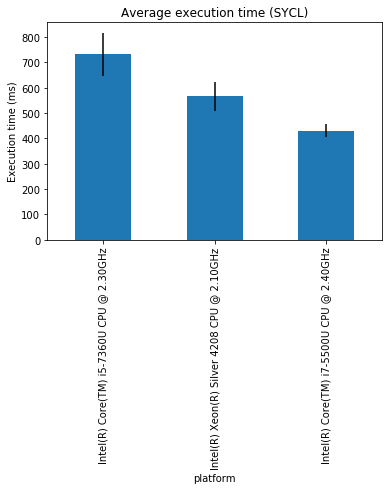

In [20]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df[df.version == 'SYCL'].groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (SYCL)")
plt.set_ylabel("Execution time (ms)")


Text(0, 0.5, 'Execution time (ms)')

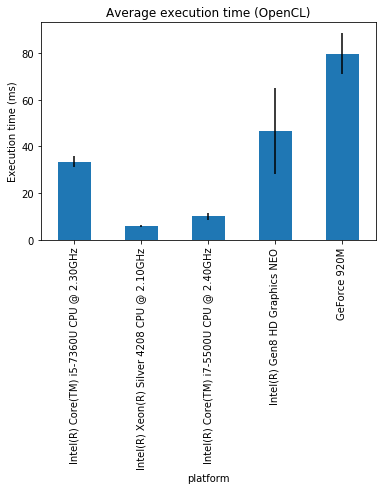

In [15]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df[df.version == 'OpenCL'].groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time (OpenCL)")
plt.set_ylabel("Execution time (ms)")